In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
## 각각의 플렛폼에 따른 폰트 설정을 위해서 
import platform   ## 플랫폼관련 라이브러리
if platform.system() == 'Windows':
    path = "c:\Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family= font_name)
elif platform.system() == 'Darwin':
    rc('font',family='AppleGothic')
else:
    print('check your OS system')

In [61]:
### chromedriver 실행
from selenium import webdriver
import time

driver = webdriver.Chrome("/Users/yunbeen/Downloads/chromedriver")

## 인스타그램 접속하기
driver.get("https://www.instagram.com")
time.sleep(2)


/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_95021/783243606.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Users/yunbeen/Downloads/chromedriver")


In [62]:
### 로그인 
email = 'leeyounbin@naver.com'   ### 계정 정보 수정 필요
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = 'lee660310!!' ### 비번 정보 수정 필요
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_95021/2901460276.py:3: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_95021/2901460276.py:8: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]


In [70]:
### 인스타 그램의 검색 결과 url을 반환하는 함수
def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/"+word
    return url


word = "제주도맛집"
url = insta_searching(word)
driver.get(url)

In [90]:
### 첫번째 게시물을 찾아 클릭
def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(4)

select_first(driver)

/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_95021/453199786.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._9AhH0")


In [91]:
### 게시글 정보 가져오기
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    html = driver.page_source
    # print(html)
    soup = BeautifulSoup(html,"html.parser")

    ### 본문내용 가져오기
    try:
        content = soup.select("div.C4VMK > div > span")[0].text
        content = unicodedata.normalize('NFC', content)

    except:
        content = ' '
    ### 본문 내용에서 해시태그 가져오기(정규표현식을 사용)
    tags = re.findall(r'#[^\s#,\\]+', content)

    ### 작성일자 정보 가져오기
    date = soup.select("time.FH9sR.RhOlS")[0]['datetime'][:10]

    ### 좋아요 수 가져오기
    try:
        like = soup.select("div._7UhW9.xLCgt.qyrsm.KV-D4.fDxYl.T0kll > span")[0].text
    except:
        like = 0
    ### 위치정보 가져오기
    try: 
        place = soup.select("a.O4GlU")[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    data = [content, date, like, place, tags]
    return data


In [92]:
### 다음 게시글 열기
def move_next(driver):
    right = driver.find_element_by_css_selector("div.l8mY4.feth3> button")
    right.click()
    time.sleep(4) 

move_next(driver)

/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_95021/3109711778.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  right = driver.find_element_by_css_selector("div.l8mY4.feth3> button")


In [88]:
#### 여러개 개시글 정보 수집하기 순서
## 1. 크롬브라우저 열기
## 2. 인스타그램 검색 페이지 url 정보 만들기 : insta_searching()
## 3. 검색페이지 접속하기
## 4. 첫번째 게시물 클릭하기
## 5. 비어있는 변수(result) 만들기
## 6. 게시글 정보 가져오기 : get_content()
## 7. 게시글 정보를 변수(result)에 추가하기
## 8. 다음 게시글 선택하기 : move_next()
## 9. 게시글은 50개 정도 크롤링후 저장 -> 수집 완료... 
## 10. 수집 데이터 저장(1_crawling_jeudoMatJip.xlsx)


from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

## 1
driver = webdriver.Chrome("/Users/yunbeen/Downloads/chromedriver")

driver.get('http://www.instargram.com')
time.sleep(3)


### 로그인 
email = 'leeyounbin@naver.com'   ### 계정 정보 수정 필요
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = 'lee660310!!' ### 비번 정보 수정 필요
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)


/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_95021/93585683.py:20: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Users/yunbeen/Downloads/chromedriver")
/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_95021/93585683.py:28: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_95021/93585683.py:33: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]


In [94]:
# 2. 
word = "제주맛집"
url = insta_searching(word)

# 3. 
driver.get(url)
time.sleep(5)

# 4.
select_first(driver)

# 5. 변수 선언
results = []

target = 50
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)

results[:3]

/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_95021/453199786.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._9AhH0")


[['.💖서귀포 "돗통"💖여기가 그 아이돌티켓팅보다 힘든예약의 난이도를 가지고있는 맛집이래..!👐하지만 예약성공을 하면 그만한 보람이 크으~야외에서 커~다란 솥에 고기구워먹고 좌글좌글한 기름에 김치까지..이건 먹어봐야 아는맛이라구!!@얼른 티켓팅 잘하는 친구들 불러봐!!!📌서귀포시 안덕면 사계북로41번길 189..#제주맛집 #제주도맛집 #제주공항근처맛집 #제주시맛집 #애월맛집 #중문맛집 #제주공항맛집 #서귀포맛집 #산방산맛집 #신제주맛집 #제주시청맛집 #제주애월맛집 #월정리맛집 #제주여행 #제주핫플',
  '2022-05-19',
  '1,015',
  '',
  ['#제주맛집',
   '#제주도맛집',
   '#제주공항근처맛집',
   '#제주시맛집',
   '#애월맛집',
   '#중문맛집',
   '#제주공항맛집',
   '#서귀포맛집',
   '#산방산맛집',
   '#신제주맛집',
   '#제주시청맛집',
   '#제주애월맛집',
   '#월정리맛집',
   '#제주여행',
   '#제주핫플']],
 ['여름같은 5월🌼', '2022-05-19', 0, '', []],
 ['#여행다녀왔습니다[🧡 제주도 맛집 총정리! 동서남북 어디로 가도 펼쳐지는 존맛 제주 🧡]아직까지 제주도 맛집 열심히 검색하고 있으신가요?!이제 그럴 필요 노노! 여앵이가 제주 맛집 싹 알아왔다구요😎한눈에 보는 제주 맛집부터동서남북으로 나누어 더 세세하게 정리도 했으니꼭!! 사진 넘겨서 봐주세요>_<솔직히 제주도 여행 가는 이유중에맛있는 거 먹으려고 하는 것도 있잖아요🍽이거 저장해놓고 행복한 제주도 여행 떠나요~~✈️#여행다녀왔습니다 로 남기는 우리들의 여행일기장----------------------------------나의 여행을 제보하고 싶다면? >> 프로필링크 그룹으로!나의 여행 사진에 #여행다녀왔습니다 태그✨여행다녀왔습니다 에디터가 찾아갑니다✨----------------------------------⠀⠀#제주여행 #제주도 #제주맛집 #제주도맛집 #제주맛집추천 #애월맛집 

In [ ]:
results[:2]

[['(광고)제주공항근처 흑돼지와 갈비를 동시에 즐길수있는 맛집💛돈오름 숯불갈비💛때깔고운 흑돼지와 갈비를 숯불향 가득 입히면서 구워먹자~!😋😋두툼하고 육즙가득한 흑돼지 맛은 말해뭐해~~ 🤤💚고기는 먹어도먹어도 질리지가 않아..🥴깔끔하고 넓은 매장이 회식, 모임장소로도 강추!👍👍👍🧭돈오름 숯불갈비주소 : 제주 제주시 신대로12길 33영업시간 : 매일 16:00~00:00예약전화 : 064-746-1578#제주도맛집#신제주맛집#연동맛집#제주공항맛집#제주도공항근처맛집#제주노형동맛집#제원맛집#누웨마루거리맛집#제주공항주변맛집#노형동맛집#제주연동맛집#제주공항흑돼지#제주공항갈비',
  '2022-05-19',
  0,
  '',
  ['#제주도맛집',
   '#신제주맛집',
   '#연동맛집',
   '#제주공항맛집',
   '#제주도공항근처맛집',
   '#제주노형동맛집',
   '#제원맛집',
   '#누웨마루거리맛집',
   '#제주공항주변맛집',
   '#노형동맛집',
   '#제주연동맛집',
   '#제주공항흑돼지',
   '#제주공항갈비']],
 ['제주 공항에서 가깝고 (🚗공항에서 12분)오션뷰& 노을뷰를 보면서 먹을 수 있는 💙삼미횟집💙 싱싱한 회는 물론이고사이드가 다양하게 손님들 모시고 오기 딱이야 🤭⛲삼미 돔모듬-대⛲-회국수 -전복,삼겹살,새우구이-삼계탕- 다양한 해산물 모듬 2판- 해물난장-성게 미역국-생선구이 2종 -매운탕등 ~ 너무 많아서 나열하기 어려운 정도! 🤪가게도 총 3층으로 룸이 나눠져 있으니깐 편하고 프라이빗하게 ~✌🧭삼미횟집제주 제주시 도두항서5길 1064-713-6400#제주도맛집#제주맛집#제주도횟집#제주시횟집#제주공항근처횟집#제주시내횟집#용두암근처맛집#용두암맛집#제주횟집추천#제주도공항근처횟집#도두맛집#이호테우해변맛집#제주공항맛집',
  '2022-05-19',
  0,
  '',
  ['#제주도맛집',
   '#제주맛집',
   '#제주도횟집',
   '#제주시횟집',
   '#제주공항근처횟집',
   '#제주시내횟집',
   '#용

In [84]:
## 결과 저장

result_df = pd.DataFrame(results)
result_df.columns = ['content','data','like','place','tags'] 
result_df.to_excel("data_instar/1_crawling_jejudoMatJip.xlsx")

In [ ]:
##  제주여행
# 2. 
word = "제주여행"
url = insta_searching(word)

# 3. 
driver.get(url)
time.sleep(5)

# 4.
select_first(driver)

# 5. 변수 선언
results = []

target = 50
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)

results[:3]

In [95]:
## 제주여행 저장
result_df = pd.DataFrame(results)
result_df.columns = ['content','data','like','place','tags'] 
result_df.to_excel("data_instar/1_crawling_jejudoYeoHaeng.xlsx")

In [81]:
## 제주 관광

# 2. 
word = "제주관광"
url = insta_searching(word)

# 3. 
driver.get(url)
time.sleep(5)

# 4.
select_first(driver)

# 5. 변수 선언
results = []

target = 50
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(3)
        move_next(driver)

results[:3]

/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_95021/453199786.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._9AhH0")


[['풍덩 빠져서 수영하고 싶은 [황우지선녀탕]🏝저는 겨울에 선녀탕에 가서 수영은 못했는데요. 물도 맑고 풍경이 아름다워서 물놀이 하러가지 않더라도 충분히 가볼만 하더라고요.🤿잠깐 물에 손을 넣어 수온을 확인 해보니 겨울이어도 오후라 그런지 엄청 차갑지는 않았어요. 여름에는 스노클링 명소라고 하니 저는 여름에 또 오려구요!!주변에 외돌개, 동너븐덕 등 다른 관광지가 가까워서 가볍게 산책하시며 둘러보시면 좋아요:)⛳제주 서귀포시 서홍동 795-5#황우지#황우지선녀탕#외돌개#선녀탕#서귀포#서귀포관광지#제주#제주관광#제주여행#제주여행지추천',
  '2022-03-15',
  '192',
  '황우지선녀탕',
  ['#황우지',
   '#황우지선녀탕',
   '#외돌개',
   '#선녀탕',
   '#서귀포',
   '#서귀포관광지',
   '#제주',
   '#제주관광',
   '#제주여행',
   '#제주여행지추천']],
 ['생일 란딩 했어요 ~^^생일이라고 란딩비용도 싸주시는 진섭형 감사 감사 ~^^그림으로 보내는 광수 아우님감사 감사 ~^^오늘은 제주도 스타벅스는 내가 다 쏜다 ㅋ많은분들 선물감사드려요 ~^^#alicetrunk_official #alicentrunk#hotel alice&trunk#앨리스앤트렁크#호텔앨리스앤트렁크 #제주호텔추천#제주호캉스#루프탑 바이브#제주숙소#제주루프탑바 #제주 가볼만한곳#제주공항호텔 #제주공항근처호텔#제주도숙박 #앨리스앤트렁크호텔#제주축제#제주관광#변진섭#루프탑#변사모#광수생각',
  '2022-05-18',
  '175',
  '',
  ['#alicetrunk_official',
   '#alicentrunk',
   '#hotel',
   '#앨리스앤트렁크',
   '#호텔앨리스앤트렁크',
   '#제주호텔추천',
   '#제주호캉스',
   '#루프탑',
   '#제주숙소',
   '#제주루프탑바',
   '#제주',
   '#제주공항호텔',
   '#제주공항근처호텔',
   '#제주도숙박',
   '#앨리스앤트렁

In [82]:
## 제주관광 저장
result_df = pd.DataFrame(results)
result_df.columns = ['content','data','like','place','tags'] 
result_df.to_excel("data_instar/1_crawling_jejudoGwanGwang.xlsx")

In [97]:
### 여러개의 저장파일을 통합(jeju_insta_df)
jeju_insta_df = pd.DataFrame([])

folder = 'data_instar/'
f_list =['1_crawling_jejudoYeoHaeng.xlsx','1_crawling_jejudoGwanGwang.xlsx','1_crawling_jejudoMatJip.xlsx']

for fname in f_list:
  fpath = folder + fname
  temp = pd.read_excel(fpath)
  jeju_insta_df = jeju_insta_df.append(temp) 

jeju_insta_df 


/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_95021/3011145165.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_95021/3011145165.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_95021/3011145165.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)


,Unnamed: 0,content,data,like,place,tags
0,0,".💖서귀포 ""돗통""💖여기가 그 아이돌티켓팅보다 힘든예약의 난이도를 가지고있는 맛집이...",2022-05-19,"1,015",NaN,"['#제주맛집', '#제주도맛집', '#제주공항근처맛집', '#제주시맛집', '#애..."
1,1,여름같은 5월🌼,2022-05-19,0,NaN,[]
2,2,#여행다녀왔습니다[🧡 제주도 맛집 총정리! 동서남북 어디로 가도 펼쳐지는 존맛 제주...,2022-05-20,"1,116",제주도,"['#여행다녀왔습니다[🧡', '#여행다녀왔습니다', '#여행다녀왔습니다', '#제주..."
3,3,제주에서만 먹을 수 있는 디저트.jpg현무암 스콘으로 난리났던 '딜레탕트'사실 딱새...,2022-05-20,702,제주도,"['#제주카페', '#딜레탕트', '#동행스타그램']"
4,4,🌸세계자동차&피아노박물관버베나가 쑥쑥 자라고 있는 야외정원💜💜좀 있으면 사진처럼 만...,2022-05-20,0,NaN,"['#제주도여행', '#제주여행', '#서귀포가볼만한곳', '#중문가볼만한곳', '..."
...,...,...,...,...,...,...
45,45,✔️윔블던 볼캡 (3col)#DEARMINDAll item Free shipping...,2022-05-20,0,NaN,['#DEARMINDAll']
46,46,🎉선비꼬마김밥 164호 제주1호노형점 신규OPEN🎉드디어 제주도에도 선비꼬마김밥이!...,2022-05-20,5,NaN,"['#선비꼬마김밥', '#선꼬김', '#꼬마김밥', '#제주1호노형점', '#제주도']"
47,47,🐾...#jeju #그러므로part2,2021-08-14,36,그러므로part.2,"['#jeju', '#그러므로part2']"
48,48,🕊,2020-01-12,32,제주도 서귀포,[]


In [99]:
jeju_insta_df.head() 
jeju_insta_df.drop_duplicates(subset=['content'],inplace=True)
jeju_insta_df.to_excel("data_instar/1_crawling_raw.xlsx",index=False)


In [ ]:
### 워드 클라우드

### 수집한 데이터 중에 해시태그 정보들을 클라우드로 시각화...
### 워드 클라우드는 텍스트 내에 출현하는 단어들의 출현 빈도수에 비례하여 크기로 표출한 그래프



In [16]:

## 크롤링 결과중 해시태그 데이터 불러오기 
import  pandas as pd
raw_total = pd.read_excel("data_instar/1_crawling_raw.xlsx")
raw_total['tags'][:5] 

0    ['#제주맛집', '#제주도맛집', '#제주공항근처맛집', '#제주시맛집', '#애...
1                                                   []
2    ['#여행다녀왔습니다[🧡', '#여행다녀왔습니다', '#여행다녀왔습니다', '#제주...
3                        ['#제주카페', '#딜레탕트', '#동행스타그램']
4    ['#제주도여행', '#제주여행', '#서귀포가볼만한곳', '#중문가볼만한곳', '...
Name: tags, dtype: object

In [17]:
### 해시태그 통합 저장하기
tags_total = []
for tags in raw_total['tags']: 
  tags_list = tags[2:-2].split("', '") 
  for tag in tags_list:
    tags_total.append(tag)
raw_total['tags'][0]   # str 
raw_total['tags'][0][2:-2].split("', '") # list   


['#제주맛집',
 '#제주도맛집',
 '#제주공항근처맛집',
 '#제주시맛집',
 '#애월맛집',
 '#중문맛집',
 '#제주공항맛집',
 '#서귀포맛집',
 '#산방산맛집',
 '#신제주맛집',
 '#제주시청맛집',
 '#제주애월맛집',
 '#월정리맛집',
 '#제주여행',
 '#제주핫플']

In [18]:
## 해시태그 빈도수 집계

from collections import Counter  ## Counter() 함수는 그룹내 원소의 종류별로 빈도수 
tag_counts = Counter(tags_total) 


In [ ]:
tag_counts.most_common(20)     ## 가장 많이 언급된 순으로 정렬해주는 함수 most_common()

In [19]:
### 데이터 정재  

STOPWORD = ['# 제주도','#제주','','#jeju','#제주맘','#일상','#먹스타맞팔',\
            '#키니샵',

]
tags_total_selected = [] 
for tag in tags_total: 
  if tag not in STOPWORD:
    tags_total_selected.append(tag)
tags_counts_selected = Counter(tags_total_selected) 
tags_counts_selected.most_common(50)   




[('#제주여행', 49),
 ('#제주관광', 26),
 ('#제주도맛집', 22),
 ('#제주맛집', 21),
 ('#제주도', 19),
 ('#제주가볼만한곳', 16),
 ('#제주도여행', 15),
 ('#제주카페', 12),
 ('#제주핫플', 8),
 ('#서귀포맛집', 7),
 ('#제주숙소', 6),
 ('#제주공항맛집', 5),
 ('#서귀포가볼만한곳', 5),
 ('#제주관광지', 5),
 ('#제주데이트코스', 5),
 ('#서귀포', 5),
 ('#제주카페추천', 4),
 ('#제주카페투어', 4),
 ('#제주소품샵', 4),
 ('#제주살이', 4),
 ('#제주도카페', 4),
 ('#제주유리박물관방문', 4),
 ('#수월봉', 4),
 ('#제주공항근처맛집', 3),
 ('#제주시맛집', 3),
 ('#중문맛집', 3),
 ('#제주시청맛집', 3),
 ('#표선맛집', 3),
 ('#안덕맛집', 3),
 ('#제주여행추천', 3),
 ('#제주데이트', 3),
 ('#중문가볼만한곳', 3),
 ('#서귀포여행', 3),
 ('#제주실내관광지', 3),
 ('#함덕맛집', 3),
 ('#여행스타그램', 3),
 ('#제주도가볼만한곳', 3),
 ('#제주여행코스', 3),
 ('#daily', 3),
 ('#제주고산리유적안내센터', 3),
 ('#고산리선사유적지', 3),
 ('#신석기유적지', 3),
 ('#신석기', 3),
 ('#고산리식토기', 3),
 ('#유적지', 3),
 ('#체험', 3),
 ('#교육', 3),
 ('#노을해안로', 3),
 ('#고산리', 3),
 ('#제주서부', 3)]

In [20]:
tag_counts_df = pd.DataFrame(tags_counts_selected.most_common(30))
tag_counts_df.columns = ['tags','counts'] 
tag_counts_df 

,tags,counts
0,#제주여행,49
1,#제주관광,26
2,#제주도맛집,22
3,#제주맛집,21
4,#제주도,19
5,#제주가볼만한곳,16
6,#제주도여행,15
7,#제주카페,12
8,#제주핫플,8
9,#서귀포맛집,7


<AxesSubplot:xlabel='counts', ylabel='tags'>

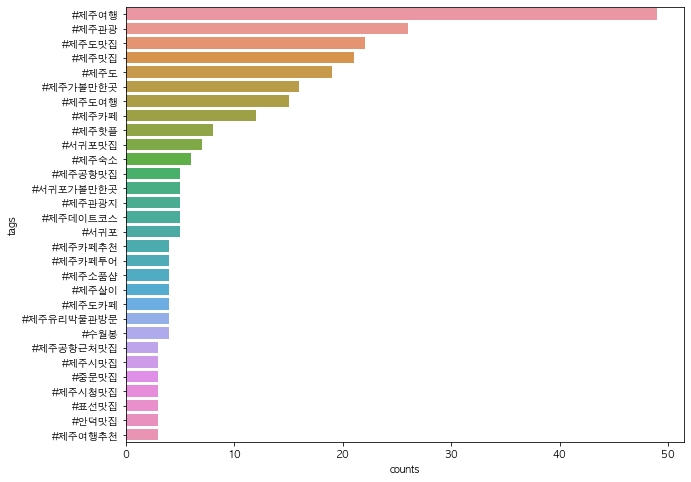

In [21]:

import matplotlib.pyplot as plt     
from matplotlib import rc       
import seaborn as sns   ## 플랫폼 관련 라이브러리, 각각의 플랫폼에 따른 폰트 설정을 위해서
%matplotlib inline         
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(10,8))
sns.barplot(x='counts',y='tags',data = tag_counts_df) 

In [9]:
pip install Wordcloud

Note: you may need to restart the kernel to use updated packages.


In [22]:
## 워드 클라우드 그리기
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import platform

if platform.system() == 'Windows': # 윈도우 경우 
    font_path  = "c:\Windows/Fonts/malgun.ttf"
elif platform.system() == 'Darwin': # 맥의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"





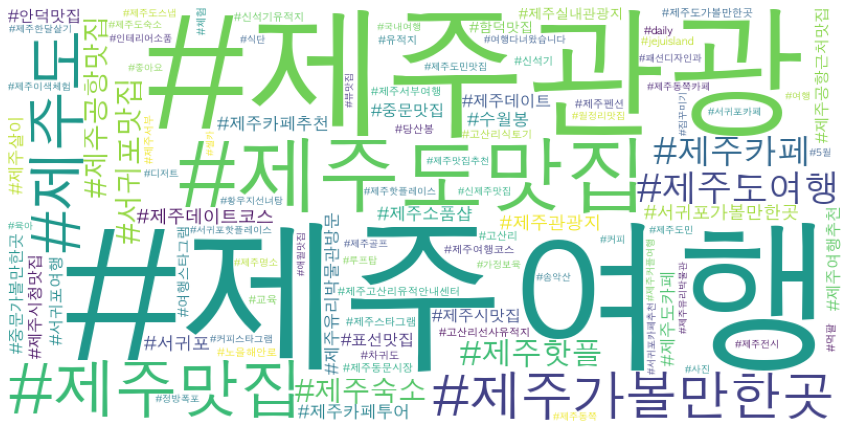

In [23]:
wordcloud = WordCloud(font_path= font_path,
              background_color="white",
              max_words=100,
              relative_scaling= 0.3,
              width= 800,
              height= 400
              ).generate_from_frequencies(tags_counts_selected)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("data_instar/2_tag-wordcloud.png")